In [ ]:
#필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import os
import matplotlib.image as mpimg
faces=[] #학습 데이터
faces1=[] # 테스트 데이터
face1=[]
for m in range(1,10):

  for n in range(1,11):
    face1.append((m,n))
    if (n==10):
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_00{m}_{n}.bmp'
      img1=mpimg.imread(img)
      faces1.append(img1)
    else:
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_00{m}_0{n}.bmp'
      img1=mpimg.imread(img)
      faces1.append(img1) #테스트 데이터
    #face0=[]
for m in range(10,100):

  for n in range(1,11):
    if (n==10):
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_0{m}_{n}.bmp'
      img1=mpimg.imread(img)
      faces.append(img1)
    else:
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_0{m}_0{n}.bmp'
      img1=mpimg.imread(img)
      faces.append(img1)#학습 데이터
    #face0=[]
for m in range(100,171):

  for n in range(1,11):
    face1.append((m,n))
    if (n==10):
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_{m}_{n}.bmp'
      img1=mpimg.imread(img)
      faces1.append(img1)
    else:
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_{m}_0{n}.bmp'
      img1=mpimg.imread(img)
      faces1.append(img1) #테스트 데이터

for m in range(171,191):

  for n in range(1,11):
    if (n==10):
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_{m}_{n}.bmp'
      img1=mpimg.imread(img)
      faces.append(img1)
    else:
      img=f'/gdrive/My Drive/ColabNote/images/eyes/eye/eye_{m}_0{n}.bmp'
      img1=mpimg.imread(img)
      faces.append(img1) #학습 데이터


print(faces)

[array([[179, 182, 184, ..., 182, 174, 176],
       [174, 167, 175, ..., 177, 181, 193],
       [185, 183, 181, ..., 173, 171, 184],
       ...,
       [201, 191, 201, ..., 185, 192, 184],
       [ 21,  21,  21, ...,  21,  22,  21],
       [ 21,  22,  21, ...,  21,  21,  21]], dtype=uint8), array([[178, 176, 176, ..., 183, 179, 177],
       [175, 175, 172, ..., 183, 184, 179],
       [180, 185, 186, ..., 181, 182, 175],
       ...,
       [209, 198, 202, ..., 187, 191, 184],
       [ 21,  21,  21, ...,  21,  21,  20],
       [ 21,  21,  21, ...,  22,  21,  21]], dtype=uint8), array([[181, 180, 176, ..., 177, 184, 181],
       [185, 179, 181, ..., 183, 175, 179],
       [178, 180, 182, ..., 184, 180, 182],
       ...,
       [212, 198, 201, ..., 189, 187, 180],
       [ 21,  21,  21, ...,  21,  21,  21],
       [ 20,  20,  21, ...,  22,  21,  21]], dtype=uint8), array([[176, 164, 165, ..., 179, 179, 172],
       [169, 158, 163, ..., 183, 185, 169],
       [179, 164, 165, ..., 177, 188, 

(1100, 240, 320)
(1100, 76800)


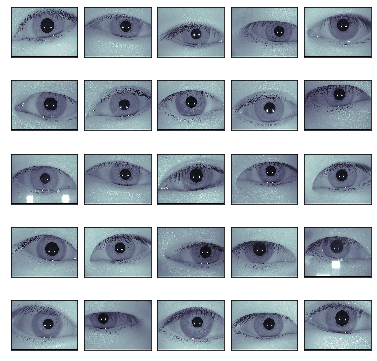

In [ ]:
faces=np.array(faces)
faces1=np.array(faces1)
print(faces.shape)
faces=np.reshape(faces,(1100,76800))
faces1=np.reshape(faces1,(800,76800))
print(faces.shape) # 240*320=76800
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

# 25개 랜덤 얼굴 영상 표시
j=1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25):
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[])
    face = np.reshape(faces[i,:],(240,320))
    ax.imshow(face, cmap='bone', interpolation='nearest')
    j += 1
pylab.show()

(1100, 400)


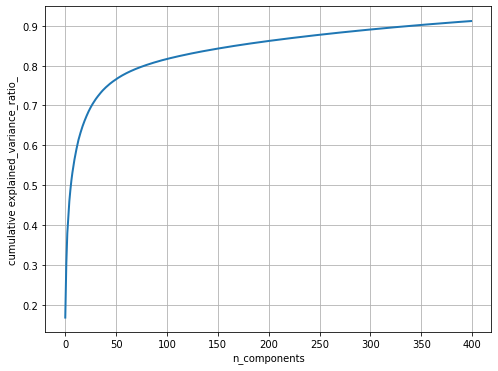

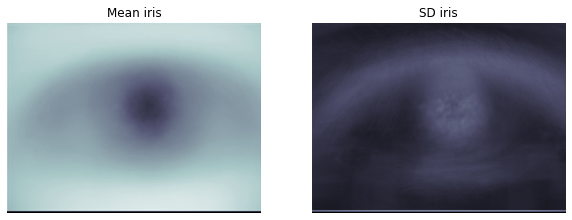

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_comp = 400 
pipeline=Pipeline([('scaling', StandardScaler()), ('pca',PCA(n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape) 

mean_face=np.reshape(pipeline.named_steps['scaling'].mean_, (240,320)) # 각 얼굴 인덱스(화소)별 평균
sd_face=np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (240,320)) # 각 얼굴 화소 - 해당 화소/인덱스의 평균 -> 얼굴의 차이값 

#faces_proj.shape
#variance_ratio

pylab.figure(figsize=(8,6))
variance_ratio=pipeline.named_steps['pca'].explained_variance_ratio_ # variance 누적합을 구해서 
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(),pylab.axis('tight'),pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show() # 차트를 보여준다.


pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face,cmap='bone')
pylab.axis('off'), pylab.title('Mean iris')
pylab.subplot(122), pylab.imshow(sd_face,cmap='bone')
pylab.axis('off'), pylab.title('SD iris')
pylab.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA(0.9)
pca.fit(faces)
print(pca.n_components)
print(pca.n_components_)#주성분
n_comp = 328 #주성분
pipeline=Pipeline([('scaling', StandardScaler()), ('pca',PCA(n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape) # 400*400

mean_face=np.reshape(pipeline.named_steps['scaling'].mean_, (240,320)) # 각 얼굴 인덱스(화소)별 평균
sd_face=np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (240,320)) # 각 얼굴 화소 - 해당 화소/인덱스의 평균 -> 얼굴의 차이값 

#faces_proj.shape
variance_ratio


0.9
328
(1100, 328)


array([0.16858745, 0.13347714, 0.07779104, 0.04057796, 0.03975974,
       0.02774271, 0.02392908, 0.01962703, 0.01723176, 0.01544522,
       0.01389611, 0.01270344, 0.01193582, 0.01129189, 0.00950218,
       0.00846374, 0.00828861, 0.00776258, 0.00715471, 0.00659219,
       0.00641757, 0.0060057 , 0.00575783, 0.00558406, 0.00522201,
       0.00473535, 0.00454852, 0.00437383, 0.00407124, 0.00398803,
       0.00366239, 0.00354246, 0.00331486, 0.00324703, 0.00318554,
       0.0030513 , 0.00294965, 0.00281557, 0.00260043, 0.00255641,
       0.00237873, 0.00231702, 0.00230913, 0.00217708, 0.00209607,
       0.0020149 , 0.00192114, 0.00188222, 0.00181318, 0.00181044,
       0.00176815, 0.0017201 , 0.0016681 , 0.00159515, 0.00155888,
       0.00150395, 0.00146157, 0.00141662, 0.00138114, 0.00132966,
       0.00132046, 0.00129517, 0.001243  , 0.00121319, 0.00117784,
       0.00115932, 0.00112107, 0.00110448, 0.00109089, 0.00107341,
       0.00105306, 0.00100391, 0.00098702, 0.00097342, 0.00095

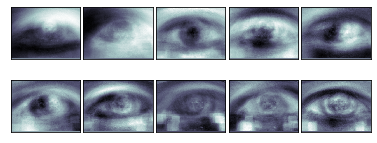

array([-0.002058  , -0.00185091, -0.00186873, ...,  0.00077156,
        0.0007959 ,  0.00083384])

In [ ]:
fig = pylab.figure(figsize=(5,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
  face =np.reshape(pipeline.named_steps['pca'].components_[i,:],(240,320))
  ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
  ax.imshow(face,cmap='bone', interpolation='nearest')

pylab.show()

pipeline.named_steps['pca'].components_[1,:] # 첫번째 고유얼굴의 variation

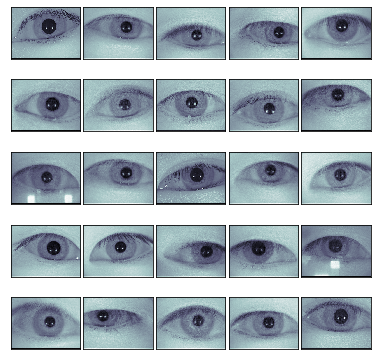

In [ ]:
faces_inv_proj=pipeline.named_steps['pca'].inverse_transform(faces_proj)
faces_inv_proj=np.reshape(faces_inv_proj, (1100,240,320))

fig=pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

j=1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25):
  reconst_face=mean_face+sd_face*faces_inv_proj[i,:] #공분산을 시켜서 공분산 시킨 값으로 주성분을 활용하여 홍채를 재조립 i번째 얼굴의 특징을 분산만큼 반영
  #reconst_face=faces_inv_proj[i,:] #주성분 분석을 이용한 얼굴의 특징백터
  #reconst_face: 학습데이터/ 학습 얼굴 이미지
  #faces_inv_proj[i,:]=sd_face'(reconst_face-mean_face) i번째 얼굴의 특징벡터
  #테스트 데이터(새로운 데이터)의 특징벡터 =pipeline.named_steps['pca'].components_[i,:] *sd_face'*(quface-mean_face)
  ax=fig.add_subplot(5,5,j,xticks=[],yticks=[])
  ax.imshow(reconst_face, cmap='bone', interpolation='nearest')
  j+=1
pylab.show() # 오리지널 이미지보다 흐릿하다 (오리지널 이미지는 모든 이미지에 대해서 주성분 분석, but 328개의 차원만 활용했으므로 더 흐릿함)

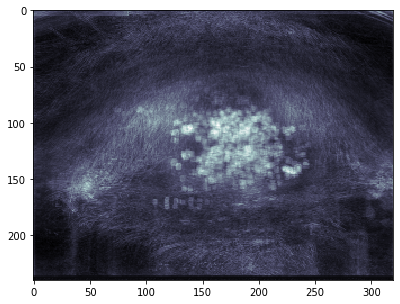

[[0.0057594  0.00598686 0.00545623 ... 0.00710038 0.00725016 0.00792413]
 [0.0058228  0.00588074 0.00573098 ... 0.00577966 0.00661646 0.00723766]
 [0.00583119 0.00608388 0.00609355 ... 0.00493684 0.00528614 0.00616212]
 ...
 [0.0019228  0.00189795 0.00187763 ... 0.00187076 0.00187454 0.0018929 ]
 [0.00231243 0.00198138 0.00188961 ... 0.00177301 0.00221437 0.00198042]
 [0.00224828 0.00194898 0.00175837 ... 0.00173602 0.00184666 0.00182509]]


In [ ]:
od=0
a=1
for i in range(328):
  face2 =np.reshape(pipeline.named_steps['pca'].components_[i,:],(240,320))
  variance =np.reshape(pipeline.named_steps['pca'].components_[i,:],(240,320))
  od+=face2*variance #원본/재구성 홍채= 고유홍채1의 variation * 고유홍채1 + 고유홍채2의 variation * 고유홍채2 + ...
  a+=1
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
ax=fig.add_subplot(111)
ax.imshow(od, cmap='bone', interpolation='nearest')
pylab.show()
print(od)

In [ ]:
from scipy.spatial import distance
newfaces_proj = pca.transform(faces1)

distance_list  = []
min=100000000
minid=-1
c=0
for i in range(800):
  line = []
  if (face1[i][1]==1):
    for j in range(800):
      if(i==j):
        continue
      elif(face1[j][1]!=1):
        if(face1[j][1]!=10):
          dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
          if(dst<min):
            min=dst
            minid=j

    if (face1[minid][0]==face1[i][0]):    #최소의 거리를 가질때의 아이디와 원본의 아이디가 일치할때 체크
      c+=1
    else:
        print("기준 : ",face1[i])   #최소의 거리를 가질때 아이디와 원본의 아이디가 일치하지 않을때 출력
        print(min)
        print(face1[minid])
  elif(face1[i][1]==10):
    for j in range(800):
      if(i==j):
        continue
      elif(face1[j][1]!=1):
        if(face1[j][1]!=10):
          dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
          if(dst<min):
            min=dst
            minid=j
    if (face1[minid][0]==face1[i][0]):
      c+=1
    else:
      print("기준 : ",face1[i])
      print(min)
      print(face1[minid])

  else:
    continue
  min=100000000
  minid=-1
print("identification accuracy",c/160*100,"%")

#최소의 거리를 가질때의 아이디와 원본의 아이디가 일치할 확률 출력

기준 :  (117, 1)
4267.899215142599
(130, 9)
기준 :  (122, 1)
3932.7006463226066
(118, 7)
기준 :  (152, 1)
6339.15982133314
(127, 8)
기준 :  (168, 1)
4789.47411377635
(114, 4)
기준 :  (168, 10)
3579.2509281650287
(103, 6)
기준 :  (169, 1)
4196.888368590492
(7, 7)
identification accuracy 96.25 %


In [ ]:
distance_list  = []
min=100000000
max=0

for i in range(800):
  line = []
  for j in range(800):
    if(i==j):
      continue
    else:
      dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
      if(dst<min):
        min=dst
      if(dst>max):
        max=dst
        



print(min)
print(max)      #거리의 최대 최솟값 출력

323.1362682392862
17574.368771676127


In [ ]:
th1=min+(max-min)*0.1
th2=min+(max-min)*0.2
th3=min+(max-min)*0.3
th4=min+(max-min)*0.4
th5=min+(max-min)*0.5
th6=min+(max-min)*0.6
th7=min+(max-min)*0.7
th8=min+(max-min)*0.8
th9=min+(max-min)*0.9
th10=max    #거리의 최대 최솟값을 활용하여 임계치를 10등분 한다.
th=[]
#print(th1)
th.append(th1)
th.append(th2)
th.append(th3)
th.append(th4)
th.append(th5)
th.append(th6)
th.append(th7)
th.append(th8)
th.append(th9)
th.append(th10)
#FRR 오거부율
c=0
m=0
#y=0 연산횟수 확인
for x in th:

  for i in range(800):
    if (face1[i][1]==1):
      for j in range(800):
        if(i==j):
          continue  #본인제외
        elif(face1[i][0]==face1[j][0]):    #아이디가 일치하는데 임계치보다 거리가 클때 (오거부)
          if(face1[j][1]!=10):
            #y+=1
            dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
            if(dst>x):
              c+=1
    elif(face1[i][1]==10):
      for j in range(800):
        if(i==j):
          continue  #본인제외
        elif(face1[i][0]==face1[j][0]): #아이디가 일치하는데 임계치보다 거리가 클때 (오거부)
          if(face1[j][1]!=1):#테스트 셋 제외
            #y+=1
            dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
            if(dst>x):
              c+=1
  #print(y)
  #y=0    
  m=c/1280      #(80*8*2)
  print("임계치 : ",x," FRR",m*100,"%")
  c=0
  m=0


임계치 :  2048.2595185829705  FRR 83.90625 %
임계치 :  3773.3827689266545  FRR 43.90625 %
임계치 :  5498.506019270339  FRR 19.140625 %
임계치 :  7223.629269614023  FRR 5.546875 %
임계치 :  8948.752519957707  FRR 1.484375 %
임계치 :  10673.87577030139  FRR 0.703125 %
임계치 :  12398.999020645075  FRR 0.0 %
임계치 :  14124.122270988759  FRR 0.0 %
임계치 :  15849.245521332443  FRR 0.0 %
임계치 :  17574.368771676127  FRR 0.0 %


In [ ]:
#FAR 오수락율
c=0
m=0
#y=0 연산횟수 확인
for x in th:

  for i in range(800):
    if (face1[i][1]==1):
      for j in range(800):
        if(i==j):
          continue
        elif(face1[i][0]!=face1[j][0]):
          if(face1[j][1]!=1):
            if(face1[j][1]!=10):
              #y+=1
              dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
              if(dst<x):         #아이디가 일치하지 않는데 임계치보다 거리가 작은 경우 (오수락)
                c+=1
    if (face1[i][1]==10):
      for j in range(800):
        if(i==j):
          continue
        elif(face1[i][0]!=face1[j][0]):
          if(face1[j][1]!=1):
            if(face1[j][1]!=10):
              #y+=1
              dst = distance.euclidean(newfaces_proj[i], newfaces_proj[j])
              if(dst<x):           #아이디가 일치하지 않는데 임계치보다 거리가 작은 경우 (오수락)
                c+=1
  #print(y)
  m=c/101120  #(80*8-8)*80*2
  print("임계치 : ",x,"FAR",m*100,"%")
  m=0
  c=0


임계치 :  2048.2595185829705 FAR 0.0 %
임계치 :  3773.3827689266545 FAR 0.03955696202531646 %
임계치 :  5498.506019270339 FAR 1.9719145569620253 %
임계치 :  7223.629269614023 FAR 13.933939873417723 %
임계치 :  8948.752519957707 FAR 42.872824367088604 %
임계치 :  10673.87577030139 FAR 73.90822784810128 %
임계치 :  12398.999020645075 FAR 91.14616297468355 %
임계치 :  14124.122270988759 FAR 98.24465981012658 %
임계치 :  15849.245521332443 FAR 99.7804588607595 %
임계치 :  17574.368771676127 FAR 99.99901107594937 %
